Zack Martin
EE 399
HW 2
https://github.com/zimartin/EE-399-HW-3

In [77]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

In [94]:
# load data set (takes a stupidly long time)
mnist = fetch_openml('mnist_784')
X, Y = mnist['data'].to_numpy(), mnist['target']

## Greyscale
# mnist = fetch_openml('mnist_784')
# X = mnist.data / 255.0
# y = mnist.target

# reshape data
X_flat = X.reshape(X.shape[0], -1)
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_flat)

C:\Users\zacki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Part 1

In [79]:
# svd on mnist
U, s, Vt = np.linalg.svd(X_stand, full_matrices=False)

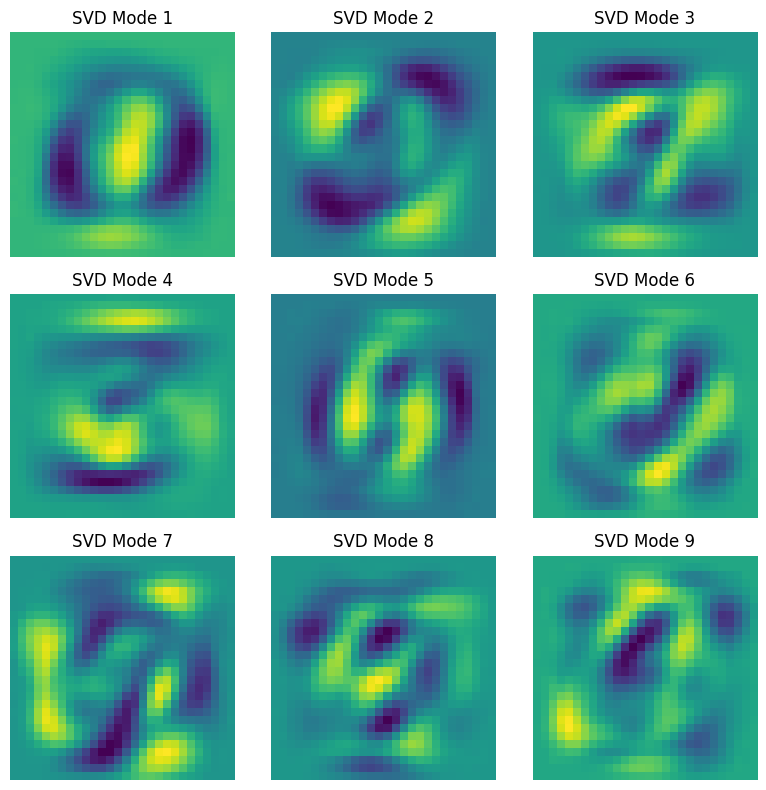

In [80]:
# plot most significant svd modes
num_modes = 9
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    eigen_digit = Vt[i].reshape(28, 28)
    ax.imshow(eigen_digit)
    ax.set_title(f'SVD Mode {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

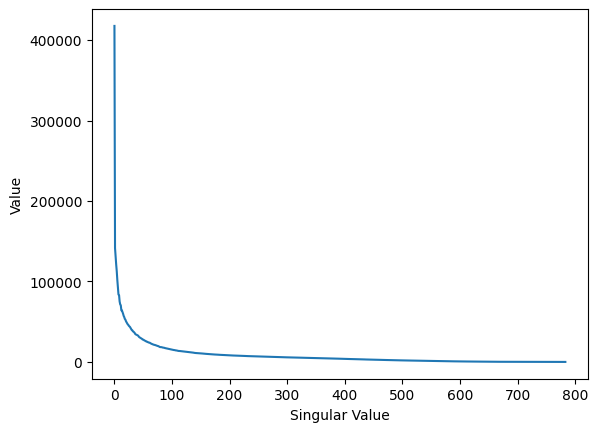

In [81]:
X = mnist.data
# Reshape each image into a column vector
Xt = X.T

# Compute SVD
svd = TruncatedSVD(n_components=784, random_state=42)
X_svd = svd.fit_transform(Xt)

# Plot the singular values
plt.plot(svd.singular_values_)
plt.xlabel('Singular Value')
plt.ylabel('Value')
plt.show()

Part 2

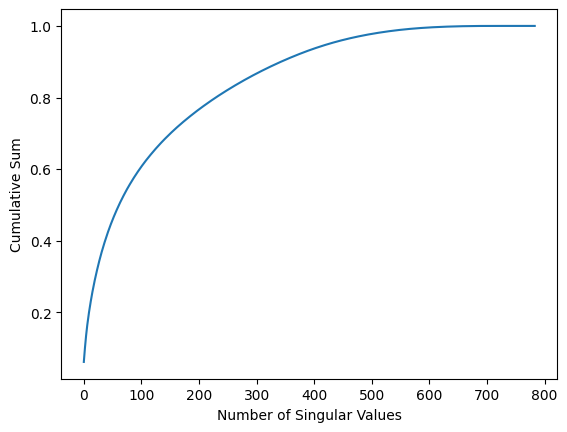

Number of modes needed for 95% variance retention: 427


In [82]:
# Calculate the cumulative sum of singular values
cumulative_sum = np.cumsum(svd.singular_values_)

# Plot the cumulative sum of singular values
plt.plot(cumulative_sum / cumulative_sum[-1])
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Sum')
plt.show()

# Find the number of modes needed for 95% variance retention
num_modes = np.argmax(cumulative_sum >= 0.95*cumulative_sum[-1]) + 1
print(f"Number of modes needed for 95% variance retention: {num_modes}")

Part 4

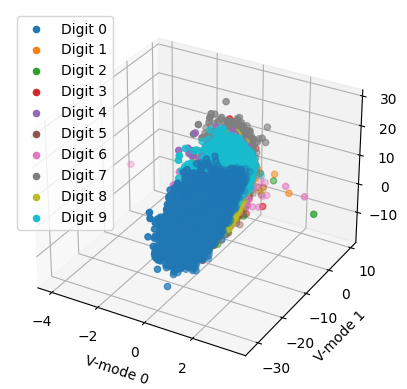

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Y = mnist['target'].to_numpy()

# three selected v-modes
V = svd.components_.T
v_cols = [0, 1, 2]

# v modes mm with data
X_proj = X_stand @ Vt[([mode - 1 for mode in v_cols]), :].T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for digit in range(10):
    indices = (Y == str(digit))
    ax.scatter(X_proj[indices, 0], X_proj[indices, 1], X_proj[indices, 2], label=f'Digit {digit}')

ax.set_xlabel(f'V-mode {v_cols[0]}')
ax.set_ylabel(f'V-mode {v_cols[1]}')
ax.set_zlabel(f'V-mode {v_cols[2]}')
ax.legend()
plt.show()


LDA Classifier

In [84]:
X, Y = mnist['data'].to_numpy(), mnist['target']

# select 2 digits
selected_digits = ['3', '8']
mask = np.isin(Y, selected_digits)
X_filt, y_filt = X[mask], Y[mask]
X_flat = X_filt.reshape(X_filt.shape[0], -1)
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_flat)

# split into training/ test
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_filt, test_size=0.2, random_state=42)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# check against test data
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

accuracy_3 = cm[0, 0] / cm[0].sum()
accuracy_8 = cm[1, 1] / cm[1].sum()

print(f"Accuracy for digit 3: {accuracy_3:.2f}")
print(f"Accuracy for digit 8: {accuracy_8:.2f}")

              precision    recall  f1-score   support

           3       0.98      0.96      0.97      1428
           8       0.96      0.97      0.96      1366

    accuracy                           0.97      2794
   macro avg       0.97      0.97      0.97      2794
weighted avg       0.97      0.97      0.97      2794

Accuracy for digit 4: 0.96
Accuracy for digit 5: 0.97


Three digit LDA classification

In [85]:
# select three digits
selected_digits = ['5', '7', '9']
mask = np.isin(Y, selected_digits)
X_filt, y_filt = X[mask], Y[mask]
X_flat = X_filt.reshape(X_filt.shape[0], -1)
scaler = StandardScaler()
X_stand = scaler.fit_transform(X_flat)

# split into training/ test
X_train, X_test, y_train, y_test = train_test_split(X_stand, y_filt, test_size=0.2, random_state=42)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = lda.predict(X_test)

# check against test data
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

accuracy_5 = cm[0, 0] / cm[0].sum()
accuracy_7 = cm[1, 1] / cm[1].sum()
accuracy_9 = cm[2, 2] / cm[2].sum()

print(f"Accuracy for digit 5: {accuracy_5:.2f}")
print(f"Accuracy for digit 7: {accuracy_7:.2f}")
print(f"Accuracy for digit 9: {accuracy_9:.2f}")

              precision    recall  f1-score   support

           3       0.94      0.91      0.93      1375
           5       0.91      0.95      0.93      1288
           7       0.98      0.96      0.97      1487

    accuracy                           0.94      4150
   macro avg       0.94      0.94      0.94      4150
weighted avg       0.94      0.94      0.94      4150

Accuracy for digit 0: 0.91
Accuracy for digit 1: 0.95
Accuracy for digit 2: 0.96


In [86]:
digit_pairs = list(itertools.combinations(range(10), 2))
accuracy = []

# compute each pair's accuracy
for pair in digit_pairs:
    selected_digits = [str(d) for d in pair]
    mask = np.isin(Y, selected_digits)
    X_filt, y_filt = X[mask], Y[mask]

    X_flat = X_filt.reshape(X_filt.shape[0], -1)
    scaler = StandardScaler()
    X_stand = scaler.fit_transform(X_flat)

    X_train, X_test, y_train, y_test = train_test_split(X_stand, y_filt, test_size=0.2, random_state=42)

    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)

    y_pred = lda.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    accuracy_1 = cm[0, 0] / cm[0].sum()
    accuracy_2 = cm[1, 1] / cm[1].sum()
    avg_accuracy = (accuracy_1 + accuracy_2) / 2

    accuracy.append(avg_accuracy)
    # print(f"Accuracy for digit pair {pair}: {avg_accuracy:.2f}")

min_index = np.argmin(accuracy)
max_index = np.argmax(accuracy)

print(f"Most difficult pair to separate: {digit_pairs[min_index]}, accuracy: {accuracy[min_index]:.2f}")
print(f"Easiest pair to separate: {digit_pairs[max_index]}, accuracy: {accuracy[max_index]:.2f}")

Accuracy for digit pair (0, 1): 0.99
Accuracy for digit pair (0, 2): 0.99
Accuracy for digit pair (0, 3): 0.99
Accuracy for digit pair (0, 4): 0.99
Accuracy for digit pair (0, 5): 0.98
Accuracy for digit pair (0, 6): 0.99
Accuracy for digit pair (0, 7): 0.99
Accuracy for digit pair (0, 8): 0.99
Accuracy for digit pair (0, 9): 0.99
Accuracy for digit pair (1, 2): 0.98
Accuracy for digit pair (1, 3): 0.98
Accuracy for digit pair (1, 4): 0.99
Accuracy for digit pair (1, 5): 0.99
Accuracy for digit pair (1, 6): 0.99
Accuracy for digit pair (1, 7): 0.99
Accuracy for digit pair (1, 8): 0.96
Accuracy for digit pair (1, 9): 0.99
Accuracy for digit pair (2, 3): 0.97
Accuracy for digit pair (2, 4): 0.98
Accuracy for digit pair (2, 5): 0.97
Accuracy for digit pair (2, 6): 0.93
Accuracy for digit pair (2, 7): 0.98
Accuracy for digit pair (2, 8): 0.97
Accuracy for digit pair (2, 9): 0.98
Accuracy for digit pair (3, 4): 0.99
Accuracy for digit pair (3, 5): 0.95
Accuracy for digit pair (3, 6): 0.99
A

In [87]:
X, Y = mnist['data'].to_numpy(), mnist['target']

# split into training/ test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size = 0.8, random_state=42)

# SVM
svm = SVC(kernel='rbf', C=1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM accuracy: {accuracy_svm:.2f}")

SVM accuracy: 0.98


In [88]:
# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree classifier accuracy: {accuracy_dtree:.2f}")

Decision Tree classifier accuracy: 0.87


In [92]:
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = [cm[i, i] / cm[i].sum() for i in range(cm.shape[0])]
    avg_accuracy = np.mean(accuracy)
    return avg_accuracy

digit_pairs = list(itertools.combinations(range(10), 2))

svm_accuracy = []
dtree_accuracy = []

for digit_pair in digit_pairs:
    selected_digits = [str(d) for d in digit_pair]
    mask = np.isin(Y, selected_digits)
    X_filt, y_filt = X[mask], Y[mask]

    X_flat = X_filt.reshape(X_filt.shape[0], -1)
    scaler = StandardScaler()
    X_stand = scaler.fit_transform(X_flat)

    X_train, X_test, y_train, y_test = train_test_split(X_stand, y_filt, test_size=0.2, random_state=42)

    svm = SVC(kernel='rbf', C=1, random_state=42)
    svm_acc = evaluate_classifier(svm, X_train, y_train, X_test, y_test)
    svm_accuracy.append(svm_acc)

    dtree = DecisionTreeClassifier(random_state=42)
    dtree_acc = evaluate_classifier(dtree, X_train, y_train, X_test, y_test)
    dtree_accuracy.append(dtree_acc)

svm_min_index = np.argmin(svm_accuracy)
svm_max_index = np.argmax(svm_accuracy)

dtree_min_index = np.argmin(dtree_accuracy)
dtree_max_index = np.argmax(dtree_accuracy)

print(f"SVM - Most difficult pair to separate: {digit_pairs[svm_min_index]}, accuracy: {svm_accuracy[svm_min_index]:.2f}")
print(f"SVM - Easiest pair to separate: {digit_pairs[svm_max_index]}, accuracy: {svm_accuracy[svm_max_index]:.2f}")

print(f"Decision Tree - Most difficult pair to separate: {digit_pairs[dtree_min_index]}, accuracy: {dtree_accuracy[dtree_min_index]:.2f}")
print(f"Decision Tree - Easiest pair to separate: {digit_pairs[dtree_max_index]}, accuracy: {dtree_accuracy[dtree_max_index]:.2f}")


SVM - Most difficult pair to separate: (7, 9), accuracy: 0.97
SVM - Easiest pair to separate: (3, 6), accuracy: 1.00
Decision Tree - Most difficult pair to separate: (2, 3), accuracy: 0.95
Decision Tree - Easiest pair to separate: (0, 1), accuracy: 1.00
